# COLWRIT R4B The Japanese American Internment and its Legacy


---

### Professor Patricia Steenland

This notebook will explore data from the camps and provide context and techniques to analize the forced relocation of Japanese Americans during the 1940s.

*Estimated Time: 90 minutes*

---

### Topics Covered
1. [Section 1: Data Exploration and Visualization](#Section-1:-Data-Exploration-and-Visualization)
2. [Section 2: Assembly Centers and Internment Centers](#Section-2:-Assembly-Centers-and-Internment-Centers)
3. [Section 3: Mapping and Movement](#Section-3:-Mapping-and-Movement)

<font color='red'>Add internal html links here</font> -

---

## Context <a id='data'></a>

In this course, you've been studying the consequences of Japanese American internment. Through this data and subsequent analysis, you'll be able to visualize the forced movement of Japanese Americans, from the west coast, to scattered internment camps, and eventually to cities throughout the country. First, we need to learn how to use this notebook format, which is called a **Jupyter Notebook.**

<font color='red'>The context should be the first thing the students see so they first see the motivation of the entire notebook. After that, you can say something along the lines of "first, we need to learn how to use this notebook format..."</font> -




## The Jupyter Notebook

First of all, note that this page is divided into what are called *cells*. You can navigate cells by clicking on them or by using the up and down arrows. Cells will be highlighted as you navigate them.

### Text cells

Text cells (like this one) can be edited by double-clicking on them. They're written in a simple format called [Markdown](http://daringfireball.net/projects/markdown/syntax) to add formatting and section headings.  You don't need to learn Markdown, but know the difference between Text Cells and Code Cells.

### Code cells
Other cells contain code in the Python 3 language. Don't worry -- we'll show you everything you need to know to succeed in this part of the class. 

The fundamental building block of Python code is an **expression**. Cells can contain multiple lines with multiple expressions.  We'll explain what exactly we mean by "expressions" in just a moment: first, let's learn how to "run" cells.

### Running cells

"Running a cell" is equivalent to pressing "Enter" on a calculator once you've typed in the expression you want to evaluate: it produces an **output**. When you run a text cell, it outputs clean, organized writing. When you run a code cell, it **computes** all of the expressions you want to evaluate, and can **output** the result of the computation.

<p></p>

<div class="alert alert-info">
To run the code in a code cell, first click on that cell to activate it.  It'll be highlighted with a little green or blue rectangle.  Next, you can either press the <code><b>▶|</b> Run </code> button above or press <b><code>Shift + Return</code></b> or <b><code>Shift + Enter</code></b>. This will run the current cell and select the next one.
</div>

Text cells are useful for taking notes and keeping your notebook organized, but your data analysis will be done in code cells. We will focus on code cells for the rest of the class.



In [27]:
print("Hello world!")

Hello world!


In [28]:
#This is a comment. It is put in code cells as a description or instructions and does not affect the code.

<font color='red'>The content from here until the import statements is unnecessary.</font> -

<font color='red'>Remove packages that aren't used in the notebook.</font> -

In [29]:
# Just run this cell
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
pop_by_month = pd.read_csv("data/CampPopulationsByMonth.csv", error_bad_lines = False)
relocations_states = pd.read_csv("data/RelocationDestinations_States.csv", error_bad_lines = False)
pop_1940_to_1945 = pd.read_csv("data/JapaneseAmericanPopulation_1940_1945.csv", error_bad_lines = False)
relocations_cities = pd.read_csv("data/RelocationDestinations_Cities.csv", error_bad_lines = False)

---

## The Data <a id='data'></a>

In this notebook, you'll be working with a dataset that was manually digitized from tables in The Evacuated People: A Quantitative Description, a report published by the War Relocation Authority in 1946. The tables required manual transcription because the results from automatic scraping contained too many errors. Thus, there may still be some human error. The datasets included contain the populations of each camp by month, the relocation destinations of those who were incarcerated, and the Japanese American population in America before and throughout the war. Take a look at the full dataset <a href = https://data.world/infinitecoop/japanese-internment-camps/> here</a>.

The second dataset we're working with is collected by the Library of Congress and comes from newspapers that were produced by Japanese-American internees while they lived in the camps. You can access the data and read about the newspapers here https://www.arcgis.com/home/item.html?id=787f1fabd34c49308df8fe0d4dc7470f <font color='red'>this url shouldn't be visible</font> <font color='blue'>Replacing with "here" didn't work we **debug together</font>

<font color='red'>It might be nice to load in the data here separately from the import statments and show a preview here as well to break up the text. </font> -

<font color='red'>Also, since there are quite a few data sets used in this notebook, it would be nice to have a description of each of the data sets and what they tell us here at the beginning of the notebook.</font> -


The **pop_by_month** table has the population of each of the ten camps at the start of every month.

In [30]:
#Loading and Reading the Data
pop_by_month = pd.read_csv("data/CampPopulationsByMonth.csv", error_bad_lines = False, thousands = ',')
pop_by_month['Date']= pd.to_datetime(pop_by_month['Date']) 
camps = pd.read_csv('data/BehindBarbedWire_StoryMap_InternmentCampLocationsMap_Data.csv', error_bad_lines = False)
camps["Maximum Population"] = camps["Maximum Population"].str.replace(',', '')
camps['Maximum Population'] = camps['Maximum Population'].astype(float)

<font color='red'>The terminology and processes here are likely completely foreign to these students, so rather than doing the data cleaning here, the <b>data should already be clean when it is read in.</b> This will avoid taking unnecessary technical detours that do not add to the learning experience.</font> -

In [31]:
pop_by_month.head()

,Date,Total,Topaz/Central Utah,Poston/Colorado River,Gila River,Granada,Heart Mountain,Jerome,Manzanar,Minidoka,Rohwer,Tule Lake
0,1942-06-01,17393,0,7281,0,0,0,0,9666,0,0,446
1,1942-07-01,27633,0,8755,0,0,0,0,9840,0,0,9038
2,1942-08-01,40316,0,13262,2106,0,0,0,9928,0,0,15020
3,1942-09-01,63031,0,17818,9150,212,5758,0,10072,4840,0,15181
4,1942-10-01,90499,5806,17847,11555,7480,10813,0,10256,9200,2265,15277


<font color='red'>Once again, try not to get into the technicalities of different data types even though this is a necessary step. This could all be done in a single "reading data in" cell.</font> -

The **camps** table by Behind the Barbed Wire has a list of the internment camps, their locations-- city, name, latitude, and longitude-- the dates of when they opened and closed, and their maximum populations.

<font color='red'>Once again, do this data cleaning behind the scenes so that there is less code for the students to get confused by.</font> -

In [32]:
camps

,Internment Camp Name,Location,State,Latitude,Longitude,Opened,Closed,Maximum Population
0,Gila River Relocation Center,Rivers,Arizona,33.065083,-111.830528,20-Jul-42,16-Nov-45,13348.0
1,Poston Relocation Center,Parker,Arizona,33.987500,-114.401111,2-Jun-42,28-Nov-45,17814.0
2,Jerome Relocation Center,Denson,Arkansas,33.411667,-91.461111,6-Oct-42,30-Jun-44,8497.0
3,Rohwer Relocation Center,McGehee,Arkansas,33.766297,-91.280158,18-Sep-42,30-Nov-45,8475.0
4,Manzanar Relocation Center,Manzanar,California,36.728333,-118.154444,2-Jun-42,21-Nov-45,10046.0
5,Tule Lake Relocation Center,Newell,California,41.889444,-121.374722,27-May-42,20-Mar-46,18789.0
6,Granada Relocation Center,Amache,Colorado,38.049444,-102.328611,27-Aug-42,15-Oct-45,7318.0
7,Minidoka Relocation Center,Hunt,Idaho,42.679000,-114.244000,10-Aug-42,28-Oct-45,9397.0
8,Topaz Relocation Center,Topaz,Utah,39.418336,-112.708750,11-Sep-42,31-Oct-45,8130.0
9,Heart Mountain Relocation Center,Heart Mountain,Wyoming,44.671667,-108.946389,12-Aug-42,10-Nov-45,343.0


The **assembly** table by Behind the Barbed Wire has the locations of each assembly center-- their city, state, latitude, and longitude--, as well as the number of people that were processed through each one.

In [33]:
assembly = pd.read_csv('data/BehindBarbedWire_StoryMap_AssemblyCentersMap_Data.csv', error_bad_lines = False)
assembly = assembly.dropna(subset=['Latitude', 'Longitude']).dropna(axis = 1)
assembly['Number of People'] = assembly['Number of People'].astype(float)
assembly

,Location,State,Number of People,Latitude,Longitude
0,Sacramento (Walerga),California,4598.0,38.566700,-121.483300
2,Manzanar (Up to 6/1/42),California,9564.0,36.728333,-118.154444
3,Fresno,California,5069.0,36.733300,-119.766700
4,Marysville (Arboga),California,2406.0,39.050000,-121.550050
5,Mayer,Arizona,249.0,34.383300,-112.233300
6,Merced,California,4081.0,37.300000,-120.466700
7,Pinedale,California,4664.0,36.840000,-119.800000
8,Pomona,California,5272.0,34.050000,-117.750000
9,Portland (Pacific Int. Exposition Ground),Oregon,3667.0,45.516700,-122.666700
10,Puyallup,Washington,7348.0,47.183300,-122.283300


The **population1940_1945** table has a list of counties that Japanese Americans lived in in 1940 and 1945. A separate column calculates the percent that returned to the county that they were from.

In [49]:
population1940_1945 = pd.read_csv("data/JapaneseAmericanPopulation_1940_1945_LL.csv", error_bad_lines = False)
population1940_1945.head()

,County,State,1940,1945,% returned,Latitude,Longitude
0,Alameda,CA,5167,2703,52.3,37.779872,-122.282185
1,Amador,CA,2,0,0.0,37.667910,-121.873914
2,Butte,CA,216,107,49.5,46.003823,-112.534777
3,Calaveras,CA,6,0,0.0,36.159706,-95.958341
4,Colusa,CA,155,48,31.0,39.214334,-122.009417


# Section 1: Data Exploration and Visualization

Sometimes numbers don't always add up. We have two separate tables with data about the internment camps, collected by two separate organizations. Say we try to compare the maximum population of the Manzanar camps from both tables.

In [50]:
pop_by_month_max = pop_by_month['Manzanar'].max()
camps_max = int(camps[camps['Internment Camp Name'] == 'Manzanar Relocation Center']['Maximum Population'])
print('Camps Data:',  camps_max)
print('Popuation by Month Data:' ,  pop_by_month_max)
#Are the two numbers equal?

Camps Data: 10046
Popuation by Month Data: 10256


The two numbers don't equal each other! The **pop_by_month** table says that the maximum population of Manzanar was 10,256, while the camps table says that the maximum was 10,046 people. While this isn't a huge difference, it's important to remember that there can be error in your datasets, and not to take any one dataset as complete and total fact. 

<font color='red'>These visualizations don't seem to belong to this section based on the title. Maybe call this section something like "data exploration and visualization" instead of having cleaning steps.</font> -

Now we can look at the data and start to see beyond the numbers. **This over-laid line plot compares the change in populations of the camps by month.** 

<font color='red'>Make sure to use descriptive object names.</font> -

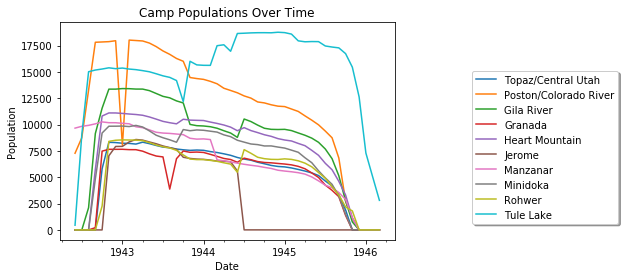

<Figure size 1080x1440 with 0 Axes>

In [51]:
date_index = pop_by_month.set_index("Date").drop("Total", axis = 1)
population_vs_date = date_index.plot.line()
plt.figure(figsize = (15, 20))
population_vs_date.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
population_vs_date.set_ylabel("Population")
population_vs_date.set_title("Camp Populations Over Time");

We can see from this histogram that most people did not return to where they originally lived because the bin that is at 0 percent returned has the highest percentage.

<font color='red'>Add descriptive labels to this plot. </font> - 

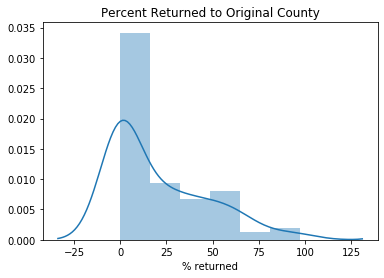

In [52]:
sns.distplot(population1940_1945['% returned'])
plt.title("Percent Returned to Original County");

Visualizations allow us to picture how the numbers change and find abnormalities in the data set. What are some abnormalities that you see in the first plot? What are some possible explanations for these abnormalities?

<b>Answer: </b> YOUR ANSWER HERE

---

## Section 2: Assembly Centers and Internment Centers<a id='section 2'></a>

After Executive Order 9066 was signed, the army was authorized to remove civilians from designated military exclusion zones spanning Washington, Oregon, California, and Arizona. Assembly centers were created to funnel Japanese Americans into internment camps. Through these maps, you can see how far people were forced to move from one location to another. Mapping data is a useful tool to visualize locations and provide context when we are given longitude and latitude data! 

<font color='red'>This seems like information that should be cited</font>

<font color='red'>There should be a description of what this map is as well as a description of how to interact with the output map (i.e. scroll or use +/- to zoom, hover over and click on markers).</font> - 

## Assembly Centers
Japanese Americans were transported from assembly centers to internment camps across the country and we can use mapping techniques to visualize the movement of Japanese Americans from their original homes, to assembly centers, to internment camps, and then to various locations afterwards.

In [53]:
m = folium.Map(location=[36.733300, -100.766700], zoom_start=4)
tooltip = 'Click me!'
for i in range(0,len(assembly)):
    folium.Marker(
      location=(assembly.iloc[i]['Latitude'], assembly.iloc[i]['Longitude']),
      popup=assembly.iloc[i]['Location'],
      ).add_to(m)
m

<font color='red'>Again, it may be useful here or at the beginning of this section to make a distinction between "assembly centers" and "relocation centers"</font> - 
## Internment Camps


In [54]:
m = folium.Map(location=[36.733300, -100.766700], zoom_start=4)
tooltip = 'Click me!'
for i in range(0,len(camps)):
    folium.Marker(
      location=(camps.iloc[i]['Latitude'], camps.iloc[i]['Longitude']),
      popup=camps.iloc[i]['Internment Camp Name'],
      ).add_to(m)
m

## Section 3: Mapping and Movement<a id='section 3'></a>

The biggest impact, among many, of Japanese internment was the subsequent relocation of Japanese Americans across the nation. While they had originally been settled and successful on the west coast, the effects of their forced internment ruined their lives, forcing them to uproot themselves and start anew.

<font color='red'>The opening statement here is kind of debatable especially considering that many Japanese Americans lost posessions and land holdings during the process of internment. Also, you seem to be making a statement here that <i>all</i> Japanese Americans originally settled on the west coast, but you have a map later in the notebook that shows that's not entirely true.</font>

This map shows the populations of each county at the start of World War II, just before the Executive Order 9066 in 1942. Japanese Americans were largely concentrated on the West Coast, with the largest population in Los Angeles.

<font color='red'>Scaling by 50 made the circle around LA so big that you couldn't even see where it was centered. It's at 20 now, and I'm not sure if that's the perfect number either, but I think something on that scale or smaller makes the map easier to read when zoomed out to the entire United States. If they want to zoom in they'll be able to see the smaller circles.</font>

In [58]:
population1940_1945.iloc[i]['1940']

814

In [59]:
m = folium.Map(location=[36.733300, -100.766700], zoom_start=4)
tooltip = 'Click me!'
for i in range(0,len(population1940_1945)):
    folium.Circle(
      location = (population1940_1945.iloc[i]['Latitude'], population1940_1945.iloc[i]['Longitude']),
      popup = population1940_1945.iloc[i]['County'],
      radius = float(population1940_1945.iloc[i]['1940']) *12,
      color = 'blue',
      fill = True,
      fill_color = 'crimson').add_to(m)
m

This table shows the amount of Japanese Americans in each county after the war. This data was self-reported by evacuees.

<font color='red'>What is different from this dataset compared to "RelocationDestinations_Cities.csv"? </font>

In [61]:
reloc_cities=pd.read_csv("data/RelocationDestinations_Cities_LL.csv", error_bad_lines = False)
reloc_cities['People'] = reloc_cities['People'].astype(float)
reloc_cities.head()

,City,State,People,Latitude,Longitude
0,Glendale,AZ,487.0,34.142508,-118.255075
1,Alameda,CA,211.0,37.779872,-122.282185
2,Berkely,CA,844.0,37.871523,-122.273042
3,Burbank,CA,228.0,34.180839,-118.308966
4,Dinuba,CA,201.0,36.543284,-119.387066


This map shows the cities that people relocated after the war. It allows us to visualize the extent people had to relocate from their original homes which were mostly on the west coast of the U.S. We can see a large population moved to the midwest (Chicago area) as well as the east coast, Canada, and even Mexico City. 

<font color='red'>Also changed the bubble scale here</font>

In [62]:
m = folium.Map(location=[36.733300, -100.766700], zoom_start=4)
tooltip = 'Click me!'
for i in range(0,len(reloc_cities)):
    folium.Circle(
      location=(reloc_cities.iloc[i]['Latitude'], reloc_cities.iloc[i]['Longitude']),
      popup=reloc_cities.iloc[i]['City'],
      radius=reloc_cities.iloc[i]['People'] * 12,
      color='blue',
      fill=True,
      fill_color='red').add_to(m)
m

<font color='red'>
    <b>General Notes:</b>
    <ul>
        <li>It would be nice to add in maybe 1-3 images throughout the notebook to add content variety and to aid in the storytelling. Make sure to check Creative Commons Licensing</li> **Maybe we can find good images together during meeting
        <li>Add a section at the end with citations for both data and information.</li>
        <li>Remove all unused files from the repository</li>
        <li>Put data in a data folder</li>
        <li>Where processing does need to be done in the notebook, explain what is happening in laymans terms where possible</li>
        <li>Object names can be verbose as long as they are descriptive</li>
    </ul>
</font>

---
Notebook developed by: Alleanna Clark, Aishah Mahmud

Data Science Modules: http://data.berkeley.edu/education/modules
